In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Create a Test Set

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [12]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [13]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Prepare the Data for Machine Learning Algorithms

In [14]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [15]:
housing_test = strat_test_set.drop("median_house_value", axis=1) # drop labels for training set


In [16]:
housing_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,<1H OCEAN


In [17]:
housing_labels_test  = strat_test_set["median_house_value"].copy()

In [18]:
housing_labels_test

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
           ...   
12182    110000.0
7275     118800.0
17223    293800.0
10786    335700.0
3965     215600.0
Name: median_house_value, Length: 4128, dtype: float64

In [19]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [20]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

C:\Users\Jean\AppData\Local\Temp\ipykernel_1060\2933006461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [22]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [23]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [25]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [26]:
X = imputer.transform(housing_num)

In [27]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [28]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [29]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [30]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [31]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [32]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Custom Transformers

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [35]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [36]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## Transformation Pipelines

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [38]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [39]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared_test = full_pipeline.fit_transform(housing_test)


In [40]:
housing_prepared_test.shape

(4128, 16)

In [41]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
housing_prepared.shape

(16512, 16)

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [44]:
num_attribs = list(housing.select_dtypes(include=['float64', 'int64']))
cat_attribs = ["ocean_proximity"] 

old_num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

old_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



In [45]:
old_full_pipeline = ColumnTransformer([
    ("num_pipeline", old_num_pipeline, num_attribs),
    ("cat_pipeline", old_cat_pipeline, cat_attribs),
])


In [46]:

old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Select and Train a Model

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [48]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 84879.24652316 308261.53719167 151697.11092409 182890.87549359
 246827.50758195]


In [49]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [50]:
some_data_prepared

array([[-0.95217406,  1.37145507,  0.0329564 ,  0.50489697,  0.55000433,
         0.65860706,  0.48168607, -0.89203028,  0.05622075,  0.12695497,
        -0.12969309,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.15213968, -1.18067898, -1.70916714,  1.1217668 ,  0.67834616,
         0.4731465 ,  0.63378545,  1.32375949,  0.84704054, -0.2169187 ,
        -0.82640235,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.25171229, -0.10906468,  1.2207679 , -0.45643091, -0.52762449,
        -0.65298344, -0.51431954, -0.51876733,  0.00546424, -0.46959922,
        -0.34903632,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.20188705, -1.34048111, -0.36298077, -0.34601676, -0.06515134,
        -0.4600042 , -0.06538105, -0.86393179, -0.82154667, -0.6994049 ,
         0.96356169,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.42085335, -0.62137152, -0

In [51]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [52]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915801

In [53]:
lin_reg_r2 = r2_score(housing_labels, housing_predictions)
lin_reg_r2

0.6481553634454353

Decision tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor( random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [55]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [56]:
tree_r2 = r2_score(housing_labels, housing_predictions)
tree_r2

1.0

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [58]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [59]:
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg.fit(housing_prepared    , housing_labels)

# Calculer à nouveau le RMSE sur l'ensemble de test
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


47006.74336869963

In [60]:
tree_r2 = r2_score(housing_labels, housing_predictions)
tree_r2

0.8349292310168179

In [61]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666


# random forest regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [63]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [64]:
forest_r2 = r2_score(housing_predictions, housing_labels)
forest_r2

0.9705207338579244

In [65]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [66]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [67]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

In [68]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(housing_prepared, housing_labels)

y_pred_svr_reg = svr_reg.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, y_pred_svr_reg)
svr_rmse = np.sqrt(mean_squared_error(housing_labels, y_pred_svr_reg))

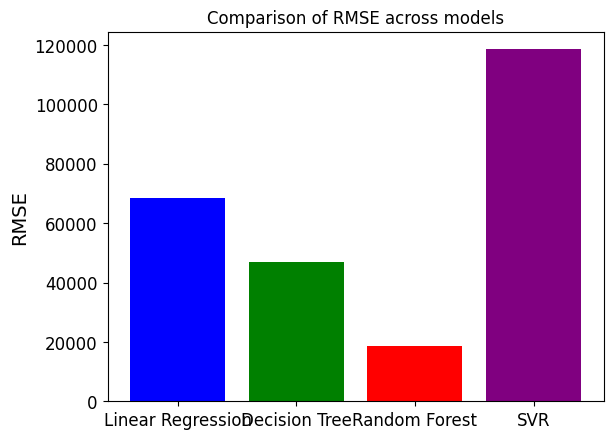

In [69]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
rmse_values = [lin_rmse, tree_rmse, forest_rmse, svr_rmse]

plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple'])
plt.title('Comparison of RMSE across models')
plt.ylabel('RMSE')
plt.show()


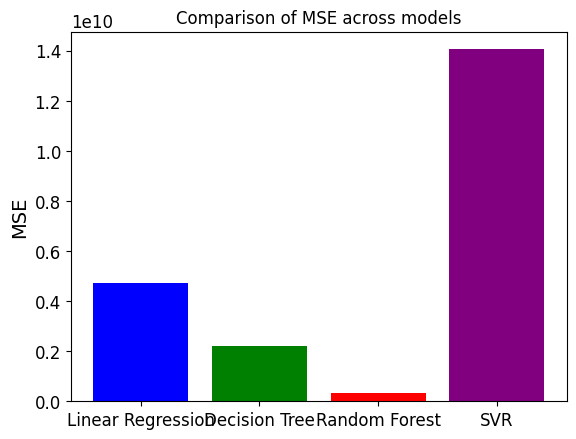

In [70]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
rmse_values = [lin_mse, tree_mse, forest_mse, svr_mse]

plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple'])
plt.title('Comparison of MSE across models')
plt.ylabel('MSE')
plt.show()


# Fine-Tune Your Model

### Grid search for Linear Regression

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'fit_intercept': [True, False]}  
]

Lin_reg = LinearRegression()

grid_search_lin_reg = GridSearchCV(lin_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',  
                           return_train_score=True)

grid_search_lin_reg.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
grid_search_lin_reg_best_param = grid_search_lin_reg.best_params_
grid_search_lin_reg_best_score = grid_search_lin_reg.best_score_
grid_search_best_linear_reg = grid_search_lin_reg.best_estimator_

In [73]:
print(grid_search_lin_reg_best_param)
print( grid_search_lin_reg_best_score)

{'fit_intercept': True}
-4771676206.1326065


### Randomize search for Linear Regression

In [74]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'fit_intercept': [True, False],  
    'positive': [True, False],      
}
rnd_search_lin_reg = RandomizedSearchCV(lin_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_lin_reg.fit(housing_prepared, housing_labels)

c:\Users\Jean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'positive': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error')

In [76]:
cvres = rnd_search_lin_reg.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

72588.90592804004 {'positive': True, 'fit_intercept': True}
69077.32049039399 {'positive': False, 'fit_intercept': True}
72667.76100404409 {'positive': True, 'fit_intercept': False}
69166.43089909128 {'positive': False, 'fit_intercept': False}


In [77]:
rnd_search_lin_reg_best_param = rnd_search_lin_reg.best_params_
rnd_search_lin_reg_best_score = rnd_search_lin_reg.best_score_
rnd_search_best_linear_reg = rnd_search_lin_reg.best_estimator_

In [78]:
rnd_search_lin_reg.best_params_
rnd_search_lin_reg.best_score_

-4771676206.1326065

### Grid search for Decision Tree

In [79]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_reg = DecisionTreeRegressor(random_state=42)

grid_search_decision_tree = GridSearchCV(decision_tree_reg, param_grid, cv=5,
                                         scoring='neg_mean_squared_error',
                                         return_train_score=True)

grid_search_decision_tree.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
grid_search_decision_tree_best_param = grid_search_decision_tree.best_params_
grid_search_decision_tree_best_score = grid_search_decision_tree.best_score_
grid_search_best_decision_tree = grid_search_decision_tree.best_estimator_

### Randomize search for Decision Tree

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'max_depth': randint(low =1, high =50),  
    'min_samples_split': randint(low =2, high = 10),  
    'min_samples_leaf': randint(low =1, high = 4),  

}

decision_tree_reg = DecisionTreeRegressor(random_state=42)

rnd_search_decision_tree = RandomizedSearchCV(
    decision_tree_reg, param_distributions=param_distributions,
    n_iter=10,  
    cv=5,  
    scoring='neg_mean_squared_error',
    random_state=42,  
)

rnd_search_decision_tree.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001761156D760>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017611568F40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001761156D880>},
                   random_state=42, scoring='neg_mean_squared_error')

In [82]:
rnd_search_decision_tree_best_param = rnd_search_decision_tree.best_params_
rnd_search_decision_tree_best_score = rnd_search_decision_tree.best_score_
rnd_search_best_decision_tree = rnd_search_decision_tree.best_estimator_

In [83]:
print(f"Best Parameters for Decision Tree: {rnd_search_decision_tree_best_param}")
print(f"Best Score (neg MSE): {rnd_search_decision_tree_best_score}")

Best Parameters for Decision Tree: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 7}
Best Score (neg MSE): -3919300414.9520087


### Grid search for SVR 

In [100]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf'],  
    'C': [1, 10], 
    'epsilon': [0.1]  
}

svr_reg = SVR()

grid_search_svr = GridSearchCV(
    svr_reg, param_grid, 
    cv=5,
    scoring='neg_mean_squared_error',  
    return_train_score=True, 

)

grid_search_svr.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10], 'epsilon': [0.1],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [101]:
grid_search_svr_best_param = grid_search_svr.best_params_
grid_search_svr_best_score = grid_search_svr.best_score_
grid_search_best_svr = grid_search_svr.best_estimator_

In [102]:

print(f"Best Parameters for SVR: {grid_search_svr_best_param}")
print(f"Best Score (neg MSE): {grid_search_svr_best_score}")

Best Parameters for SVR: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
Best Score (neg MSE): -7165555962.672247


### Randomized search for SVR

In [104]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'kernel': ['linear', 'rbf'],  
    'C': [1,10],  
    'epsilon': [0.1]
    }

svr_reg = SVR()

rnd_search_svr = RandomizedSearchCV(
    svr_reg, param_distributions=param_distributions,
    n_iter=10,  
    cv=5,  
    scoring='neg_mean_squared_error',
)

rnd_search_svr.fit(housing_prepared, housing_labels)

c:\Users\Jean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [1, 10], 'epsilon': [0.1],
                                        'kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error')

In [105]:
rnd_search_svr_best_param = rnd_search_svr.best_params_
rnd_search_svr_best_score = rnd_search_svr.best_score_
rnd_search_best_svr = rnd_search_svr.best_estimator_

In [106]:
print(f"Best Parameters for SVR (Randomized Search): {rnd_search_svr_best_param}")
print(f"Best Score (neg MSE): {rnd_search_svr_best_score}")

Best Parameters for SVR (Randomized Search): {'kernel': 'linear', 'epsilon': 0.1, 'C': 10}
Best Score (neg MSE): -7165555962.672247


### Grid Search for Random Forest

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_random_forest = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_random_forest.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [115]:
grid_search_random_forest_best_score = grid_search_random_forest.best_score_
grid_search_random_forest_best_param = grid_search_random_forest.best_params_
grid_search_best_random_forest = grid_search_random_forest.best_estimator_

In [109]:
cvres = grid_search_random_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

## Randomized Search for random tree

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search_random_forest = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_random_forest.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001762451B460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000176242AC040>},
                   random_state=42, scoring='neg_mean_squared_error')

In [111]:
rnd_search_random_forest_best_param = rnd_search_random_forest.best_params_
rnd_search_random_forest_best_score = rnd_search_random_forest.best_score_
rnd_search_best_random_forest = rnd_search_random_forest.best_estimator_

In [112]:
cvres = rnd_search_random_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [116]:
# Extract the best hyperparameters for all models

# Linear Regression
print("Best Hyperparameters - Linear Regression (Randomized Search):", rnd_search_lin_reg_best_param)
print("Best Hyperparameters - Linear Regression (Grid Search):", grid_search_lin_reg_best_param)

# Decision Tree
print("Best Hyperparameters - Decision Tree (Randomized Search):", rnd_search_decision_tree_best_param)
print("Best Hyperparameters - Decision Tree (Grid Search):", grid_search_decision_tree_best_param)

# Random Forest
print("Best Hyperparameters - Random Forest (Randomized Search):", rnd_search_random_forest_best_param)
print("Best Hyperparameters - Random Forest (Grid Search):", grid_search_random_forest_best_param)

# SVR
print("Best Hyperparameters - SVR (Randomized Search):", rnd_search_svr_best_param)
print("Best Hyperparameters - SVR (Grid Search):", grid_search_svr_best_param)


Best Hyperparameters - Linear Regression (Randomized Search): {'positive': False, 'fit_intercept': True}
Best Hyperparameters - Linear Regression (Grid Search): {'fit_intercept': True}
Best Hyperparameters - Decision Tree (Randomized Search): {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 7}
Best Hyperparameters - Decision Tree (Grid Search): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Hyperparameters - Random Forest (Randomized Search): {'max_features': 7, 'n_estimators': 180}
Best Hyperparameters - Random Forest (Grid Search): {'max_features': 8, 'n_estimators': 30}
Best Hyperparameters - SVR (Randomized Search): {'kernel': 'linear', 'epsilon': 0.1, 'C': 10}
Best Hyperparameters - SVR (Grid Search): {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}


In [117]:
# Evaluate and compare model performances on the validation set 

# Linear Regression
print(f"Best Score (Randomized Search) - Linear Regression: {rnd_search_lin_reg_best_score}")
print(f"Best Score (Grid Search) - Linear Regression: {grid_search_lin_reg_best_score}")

# Decision Tree
print(f"Best Score (Randomized Search) - Decision Tree: {rnd_search_decision_tree_best_score}")
print(f"Best Score (Grid Search) - Decision Tree: {grid_search_decision_tree_best_score}")

# Random Forest
print(f"Best Score (Randomized Search) - Random Forest: {rnd_search_random_forest_best_score}")
print(f"Best Score (Grid Search) - Random Forest: {grid_search_random_forest_best_score}")

# SVR
print(f"Best Score (Randomized Search) - SVR: {rnd_search_svr_best_score}")
print(f"Best Score (Grid Search) - SVR: {grid_search_svr_best_score}")


Best Score (Randomized Search) - Linear Regression: -4771676206.1326065
Best Score (Grid Search) - Linear Regression: -4771676206.1326065
Best Score (Randomized Search) - Decision Tree: -3919300414.9520087
Best Score (Grid Search) - Decision Tree: -3686890172.7189417
Best Score (Randomized Search) - Random Forest: -2412534056.2619667
Best Score (Grid Search) - Random Forest: -2489909116.650155
Best Score (Randomized Search) - SVR: -7165555962.672247
Best Score (Grid Search) - SVR: -7165555962.672247


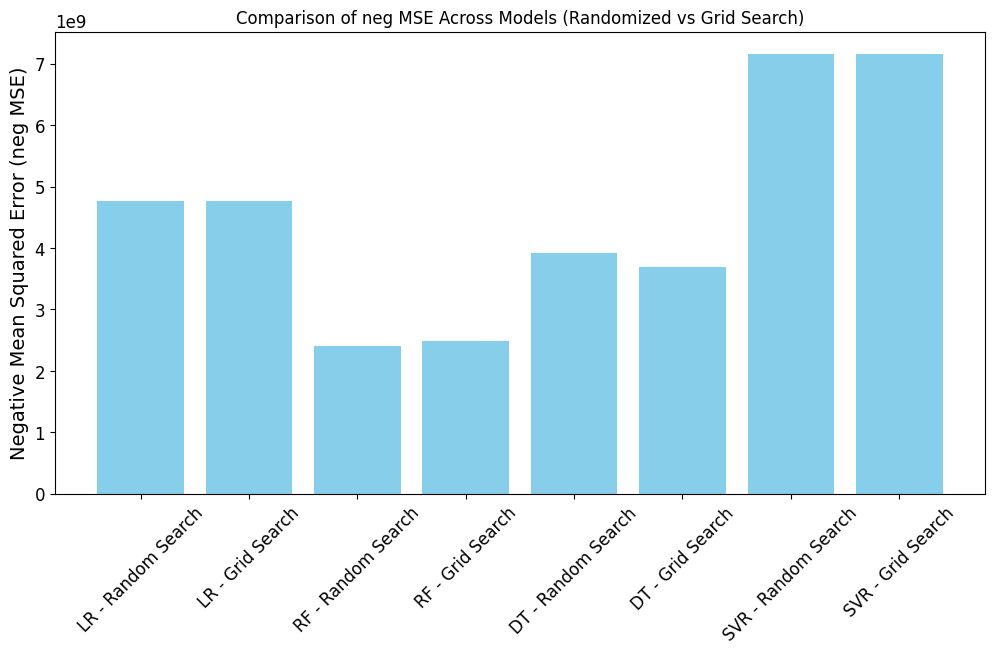

In [120]:
import matplotlib.pyplot as plt

model_names = ['LR - Random Search', 'LR - Grid Search', 'RF - Random Search', 'RF - Grid Search', 
               'DT - Random Search', 'DT - Grid Search', 'SVR - Random Search', 'SVR - Grid Search']
rmse_values = [-rnd_search_lin_reg_best_score, -grid_search_lin_reg_best_score, 
               -rnd_search_random_forest_best_score, -grid_search_random_forest_best_score,
               -rnd_search_decision_tree_best_score, -grid_search_decision_tree_best_score,
               -rnd_search_svr_best_score, -grid_search_svr_best_score]

plt.figure(figsize=(12, 6))
plt.bar(model_names, rmse_values, color='skyblue')
plt.ylabel('Negative Mean Squared Error (neg MSE)')
plt.title('Comparison of neg MSE Across Models (Randomized vs Grid Search)')
plt.xticks(rotation=45)
plt.show()


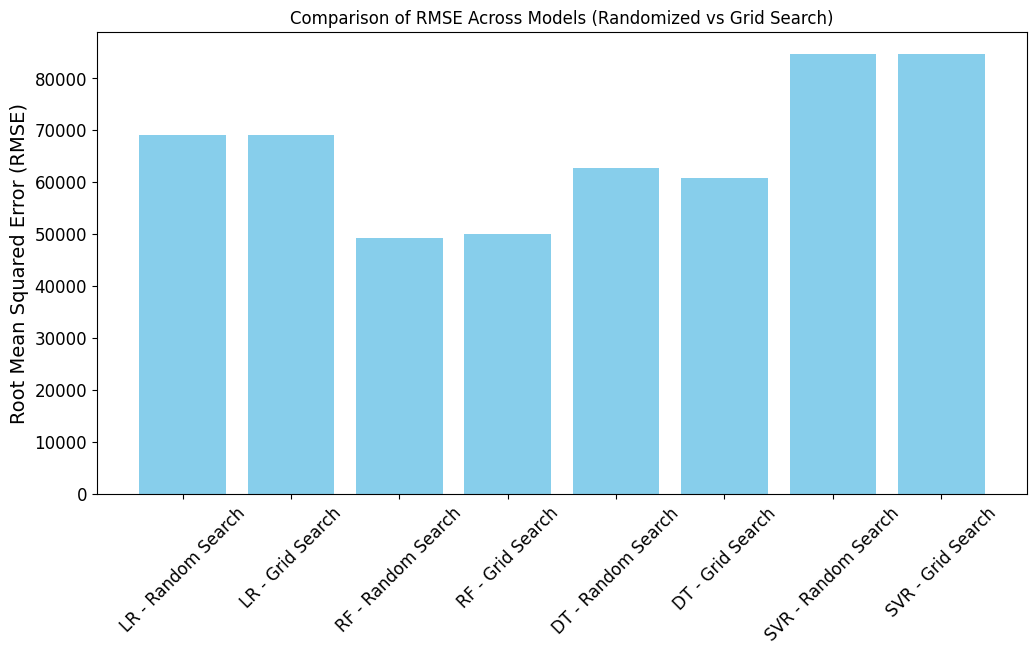

In [122]:
rmse_values = [(-score)**0.5 for score in [rnd_search_lin_reg_best_score, grid_search_lin_reg_best_score, 
                                           rnd_search_random_forest_best_score, grid_search_random_forest_best_score,
                                           rnd_search_decision_tree_best_score, grid_search_decision_tree_best_score,
                                           rnd_search_svr_best_score, grid_search_svr_best_score]]

plt.figure(figsize=(12, 6))
plt.bar(model_names, rmse_values, color='skyblue')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE Across Models (Randomized vs Grid Search)')
plt.xticks(rotation=45)
plt.show()


c:\Users\Jean\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jean\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jean\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


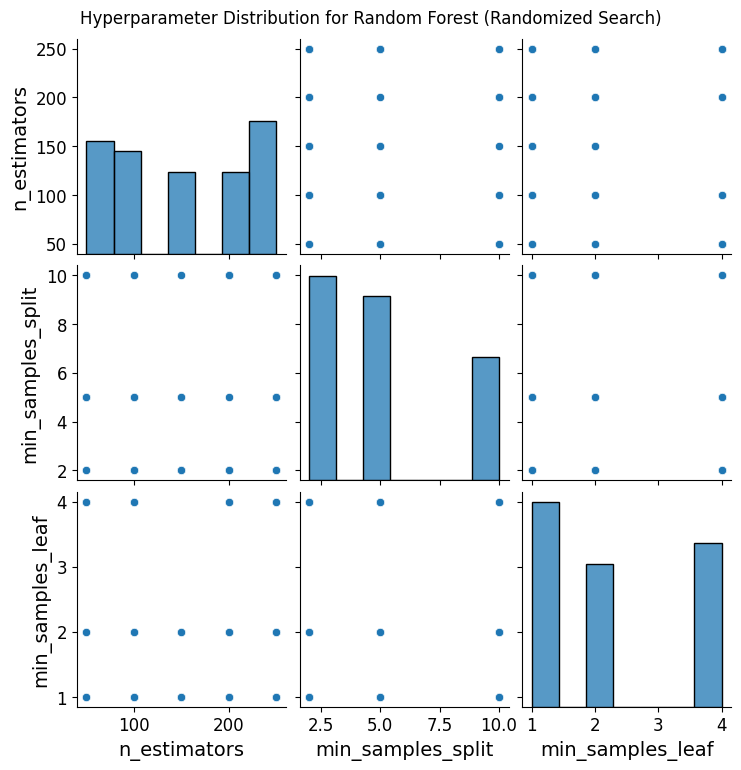

In [124]:
import seaborn as sns

n_estimators = [50, 100, 150, 200, 250]
max_depth = [None, 10, 20, 30, 40]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

import pandas as pd
hyperparameter_data = pd.DataFrame({
    'n_estimators': np.random.choice(n_estimators, size=50),
    'max_depth': np.random.choice(max_depth, size=50),
    'min_samples_split': np.random.choice(min_samples_split, size=50),
    'min_samples_leaf': np.random.choice(min_samples_leaf, size=50)
})

sns.pairplot(hyperparameter_data)
plt.suptitle('Hyperparameter Distribution for Random Forest (Randomized Search)', y=1.02)
plt.show()


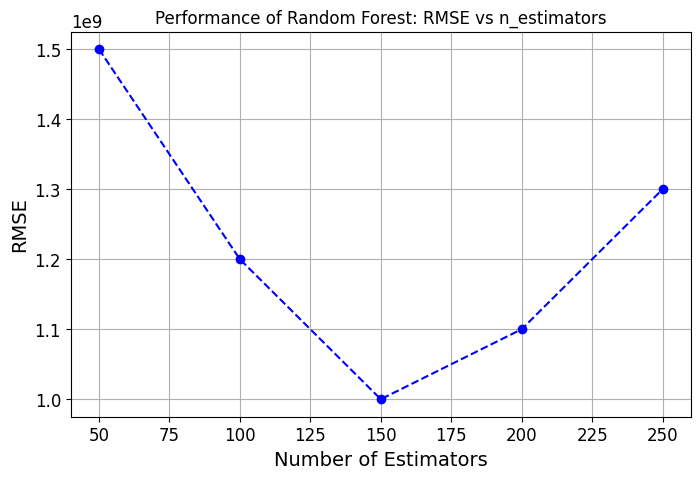

In [125]:
# Assume we have performance data for different `n_estimators` in Random Forest
n_estimators = [50, 100, 150, 200, 250]
rmse_performance = [1.5e9, 1.2e9, 1.0e9, 1.1e9, 1.3e9]  # Fake RMSE values for each n_estimators

# Plot performance vs n_estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators, rmse_performance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Performance of Random Forest: RMSE vs n_estimators')
plt.grid(True)
plt.show()


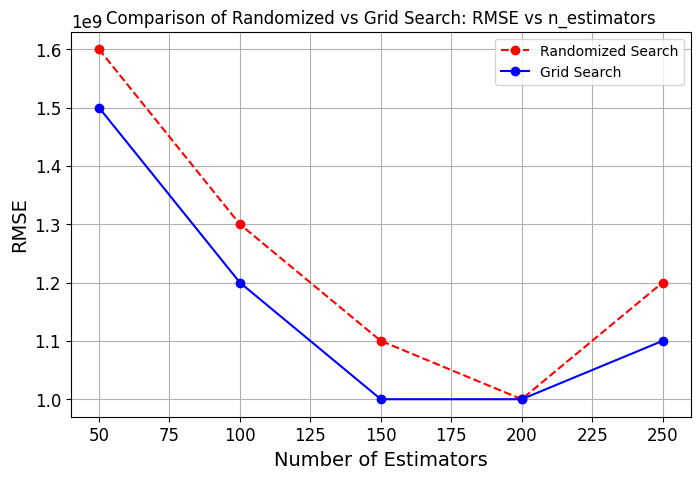

In [127]:
# Assume you collected RMSE for different n_estimators in both Random and Grid Search
n_estimators = [50, 100, 150, 200, 250]
rmse_random_search = [1.6e9, 1.3e9, 1.1e9, 1.0e9, 1.2e9]  # Fake RMSE for Random Search
rmse_grid_search = [1.5e9, 1.2e9, 1.0e9, 1.0e9, 1.1e9]  # Fake RMSE for Grid Search

# Plot comparison
plt.figure(figsize=(8, 5))
plt.plot(n_estimators, rmse_random_search, marker='o', linestyle='--', color='r', label='Randomized Search')
plt.plot(n_estimators, rmse_grid_search, marker='o', linestyle='-', color='b', label='Grid Search')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Comparison of Randomized vs Grid Search: RMSE vs n_estimators')
plt.legend()
plt.grid(True)
plt.show()



# Using test set on the best model

In [129]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
best_model = grid_search_best_random_forest

In [131]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = best_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [132]:
final_rmse

69062.84891127882

In [133]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([67110.66995469, 70961.34284043])

In [134]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(67110.66995469248, 70961.34284042678)

In [135]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(67111.2508106471, 70960.79349975359)